# Pierce - Diversity Metrics
Author: Leo Joseph (l1joseph@ucsd.edu)

Note: All data here is unfiltered and has no coverage filter applied

In [1]:
import pandas as pd
import qupid
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

# qiime2 imports
import qiime2 as q2
from qiime2 import Artifact, Metadata, Visualization
from qiime2.plugins.feature_table.methods import filter_features, filter_samples
import qiime2.plugins.diversity.actions as diversity_actions


# birdman imports
import biom
import numpy as np


In [3]:
# need to calculate all these metrics: Shannon, observed, chao1, PDwhole

## Computing all alpha & beta diversity metrics

In [9]:
# table = Artifact.import_data("FeatureTable[Frequency]", "qiita/191733_none.biom")
table = Artifact.import_data("FeatureTable[Frequency]", "qiita/195330_none.biom")
phylogeny = Artifact.import_data("Phylogeny[Rooted]", "/projects/wol/qiyun/wol2/phylogeny/tree.nwk")
sampling_depth = 500000
metadata = Metadata.load("qiita/15350_20240110-175840.txt")

### Compute metrics

In [5]:
action_results = diversity_actions.core_metrics_phylogenetic(
    phylogeny=phylogeny,
    table=table,
    sampling_depth=sampling_depth,
    metadata=metadata,
)

rarefied_table = action_results.rarefied_table
faith_pd_vector = action_results.faith_pd_vector
observed_features_vector = action_results.observed_features_vector
shannon_vector = action_results.shannon_vector
evenness_vector = action_results.evenness_vector
unweighted_unifrac_distance_matrix = action_results.unweighted_unifrac_distance_matrix
weighted_unifrac_distance_matrix = action_results.weighted_unifrac_distance_matrix
jaccard_distance_matrix = action_results.jaccard_distance_matrix
bray_curtis_distance_matrix = action_results.bray_curtis_distance_matrix
unweighted_unifrac_pcoa_results = action_results.unweighted_unifrac_pcoa_results
weighted_unifrac_pcoa_results = action_results.weighted_unifrac_pcoa_results
jaccard_pcoa_results = action_results.jaccard_pcoa_results
bray_curtis_pcoa_results = action_results.bray_curtis_pcoa_results
unweighted_unifrac_emperor_viz = action_results.unweighted_unifrac_emperor
weighted_unifrac_emperor_viz = action_results.weighted_unifrac_emperor
jaccard_emperor_viz = action_results.jaccard_emperor
bray_curtis_emperor_viz = action_results.bray_curtis_emperor

/home/l1joseph/miniforge3/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.1394568314764479 and the largest is 3.673402833704315.
  warn(


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2/l1joseph/data/7a25dea7-4fe1-403e-b5e6-079a0b48e01b/data/feature-table.biom -t /tmp/qiime2/l1joseph/data/d32265e5-424e-4305-b743-04b5c303a870/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-qehukm4j

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2/l1joseph/data/7a25dea7-4fe1-403e-b5e6-079a0b48e01b/data/feature-table.biom -t /tmp/qiime2/l1joseph/data/d32265e5-424e-4305-b743-04b5c303a870/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-ugmlk8y6

Running external command line application. This may print messages to stdout and/or stderr.
T

/home/l1joseph/miniforge3/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.25245226070458243 and the largest is 9.62679784550241.
  warn(


In [6]:
faith_pd_group_significance_viz, = diversity_actions.alpha_group_significance(
    alpha_diversity=faith_pd_vector,
    metadata=metadata,
)
evenness_group_significance_viz, = diversity_actions.alpha_group_significance(
    alpha_diversity=evenness_vector,
    metadata=metadata,
)

### Save Q2 artifacts

In [7]:
if not os.path.exists(f'out/rarefaction_{sampling_depth}'):
    os.makedirs(f'out/rarefaction_{sampling_depth}')

rarefied_table.save(f'out/rarefaction_{sampling_depth}/rarefied_table.qza')
faith_pd_vector.save(f'out/rarefaction_{sampling_depth}/faith_pd_vector.qza')
observed_features_vector.save(f'out/rarefaction_{sampling_depth}/observed_features_vector.qza')
shannon_vector.save(f'out/rarefaction_{sampling_depth}/shannon_vector.qza')
evenness_vector.save(f'out/rarefaction_{sampling_depth}/evenness_vector.qza')
unweighted_unifrac_distance_matrix.save(f'out/rarefaction_{sampling_depth}/unweighted_unifrac_distance_matrix.qza')
weighted_unifrac_distance_matrix.save(f'out/rarefaction_{sampling_depth}/weighted_unifrac_distance_matrix.qza')
jaccard_distance_matrix.save(f'out/rarefaction_{sampling_depth}/jaccard_distance_matrix.qza')
bray_curtis_distance_matrix.save(f'out/rarefaction_{sampling_depth}/bray_curtis_distance_matrix.qza')
unweighted_unifrac_pcoa_results.save(f'out/rarefaction_{sampling_depth}/unweighted_unifrac_pcoa_results.qza')
weighted_unifrac_pcoa_results.save(f'out/rarefaction_{sampling_depth}/weighted_unifrac_pcoa_results.qza')
jaccard_pcoa_results.save(f'out/rarefaction_{sampling_depth}/jaccard_pcoa_results.qza')
bray_curtis_pcoa_results.save(f'out/rarefaction_{sampling_depth}/bray_curtis_pcoa_results.qza')
unweighted_unifrac_emperor_viz.save(f'out/rarefaction_{sampling_depth}/unweighted_unifrac_emperor.qzv')
weighted_unifrac_emperor_viz.save(f'out/rarefaction_{sampling_depth}/weighted_unifrac_emperor.qzv')
jaccard_emperor_viz.save(f'out/rarefaction_{sampling_depth}/jaccard_emperor.qzv')
bray_curtis_emperor_viz.save(f'out/rarefaction_{sampling_depth}/bray_curtis_emperor.qzv')

'out/rarefaction_500000/bray_curtis_emperor.qzv'

In [8]:
faith_pd_group_significance_viz.save(f'out/rarefaction_{sampling_depth}/faith_pd_group_significance.qzv')
evenness_group_significance_viz.save(f'out/rarefaction_{sampling_depth}/evenness_group_significance.qzv')

'out/rarefaction_500000/evenness_group_significance.qzv'

## Load Metadata 
### (from 00_metadata)

In [3]:
metadata = pd.read_table("data/Metadata.tsv", sep="\t", index_col=0)
fpd = Artifact.load('out/rarefaction_500000/faith_pd_vector.qza') 


In [4]:
metadata['ados_cosototrrtot'] = metadata['ados_cosototrrtot'].astype(int)
metadata['ados_cosotot'] = metadata['ados_cosotot'].astype(int)
metadata['ados_rrtot'] = metadata['ados_rrtot'].astype(int)
metadata['dna_extracted'] = metadata['dna_extracted'].astype(int)

In [12]:
print(metadata.shape)
metadata.head()


(83, 91)


,ados_cosotot,ados_cosototrrtot,ados_rrtot,ageatfecalsample,anonymized_name,antibiotics_last_2weeks,attend_daycare,breastfed_morethan1month,collection_date,collection_timestamp,...,sex,taxon_id,title,tube_id,vine_adapbehav_domstd,vine_comtotal_domstd,vine_dlytotal_domstd,vine_mtrtotal_domstd,vine_soctotal_domstd,zipcode
sample_name,,,,,,,,,,,,,,,,,,,,,
15350.A5U7C.2,8,14,6,35,X00235506,0,0.0,1,2023-02-08,2023-02-08,...,male,408170,Pierce ASD project,363146269,82,74,78,100,103,92026.0
15350.A6N5R.1,12,18,6,16,X00235660,0,0.0,1,2022-06-28,2022-06-28,...,male,408170,Pierce ASD project,363146304,95,96,95,102,99,92154.0
15350.A6T5B.1,1,2,1,14,X00235600,0,1.0,1,2022-04-18,2022-04-18,...,male,408170,Pierce ASD project,363146249,98,94,100,114,101,92102.0
15350.A7B7Z.1,20,27,7,24,X00235539,1,0.0,1,2022-06-21,2022-06-21,...,male,408170,Pierce ASD project,363146321,64,54,69,69,65,91950.0
15350.A7L6P.1,20,28,8,27,X00235658,0,0.0,1,2022-06-21,2022-06-21,...,male,408170,Pierce ASD project,363146256,74,60,92,89,75,91910.0


Join with faithpd

In [5]:
asd_fpd = metadata.join(fpd.view(pd.Series))

## Using Qupid for Case-Control-Matching

Pre-CCM

/home/l1joseph/miniforge3/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


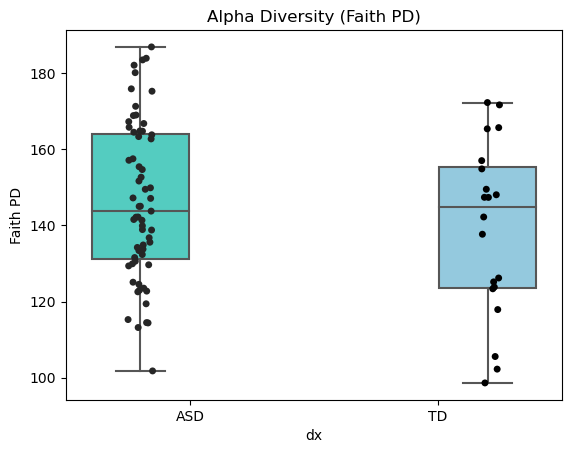

In [9]:
sns.boxplot(x='dx', y='faith_pd', data=asd_fpd, hue='dx', palette=['turquoise', 'skyblue'])
sns.stripplot(x='dx', y='faith_pd', data=asd_fpd, hue='dx', dodge=True, jitter=True, color='black') 

plt.title('Alpha Diversity (Faith PD)')
plt.ylabel('Faith PD')
plt.legend(loc='upper center', fontsize = "7").set_visible(False)
plt.show()

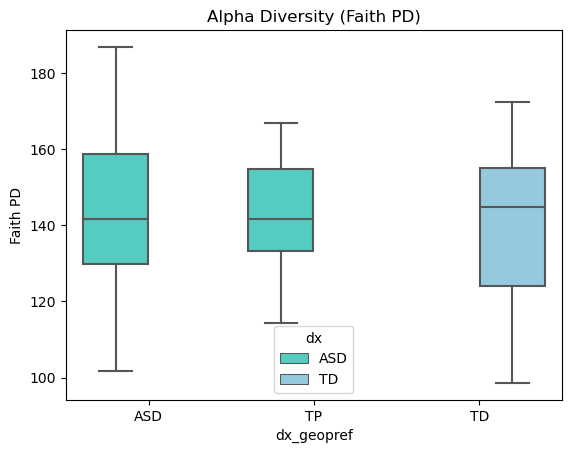

In [73]:
sns.boxplot(x='dx_geopref', y='faith_pd', data=asd_fpd, hue='dx', palette=['turquoise', 'skyblue'])

plt.title('Alpha Diversity (Faith PD)')
plt.ylabel('Faith PD')
plt.show()


CCM

In [20]:
asd_str = "TP"
no_asd_str = "TD"

background = asd_fpd.query("dx_mtrtraffic == @no_asd_str")
focus = asd_fpd.query("dx_mtrtraffic == @asd_str")
# focus.drop(index='15350.A7L6P.1', inplace=True)
# focus.drop(index='15350.C3Z7C.1', inplace=True)


matches = qupid.shuffle(
    focus=focus,
    background=background,
    categories=["host_age"],
    tolerance_map={"host_age": 3},
    iterations=100,
    on_failure="ignore"
)

/home/l1joseph/miniforge3/envs/qiime2-shotgun-2024.2/lib/python3.8/site-packages/qupid/qupid.py:49: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for f_idx, f_val in focus.iteritems():


/tmp/ipykernel_9427/3782623130.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd_tp_df['Group'] = 'ASD-TP'
/tmp/ipykernel_9427/3782623130.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd_tp_df['Group'] = 'ASD-TP'


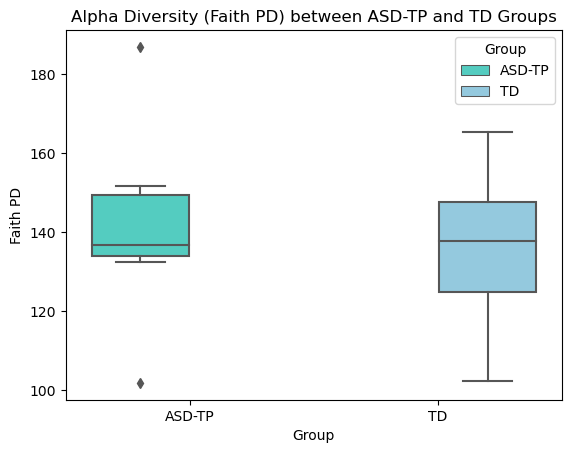

Kruskal-Wallis Test Statistic: 0.03673469387754835, p-value: 0.8480062142193152


In [74]:
# Filter for ASD-TP group
asd_tp_df = asd_fpd[asd_fpd['dx_mtrtraffic'] == 'TP']
td_df = asd_fpd[asd_fpd['dx_mtrtraffic'] == 'TD'].sample(n=len(asd_tp_df), random_state=42)

asd_tp_df['Group'] = 'ASD-TP'
td_df['Group'] = 'TD'

# Concatenate the two DataFrames and add a new column to label the groups
asd_tp_df['Group'] = 'ASD-TP'
td_df['Group'] = 'TD'
combined_df = pd.concat([asd_tp_df, td_df])

# Plotting
sns.boxplot(x='Group', y='faith_pd', data=combined_df, hue='Group', palette=['turquoise', 'skyblue'])
plt.title('Alpha Diversity (Faith PD) between ASD-TP and TD Groups')
plt.ylabel('Faith PD')
plt.show()

# Extracting Faith PD values for each group
faith_pd_asd_tp = combined_df[combined_df['Group'] == 'ASD-TP']['faith_pd']
faith_pd_td = combined_df[combined_df['Group'] == 'TD']['faith_pd']

# Kruskal-Wallis Test
stat1, p1 = kruskal(faith_pd_asd_tp, faith_pd_td)
print(f'Kruskal-Wallis Test Statistic: {stat1}, p-value: {p1}')

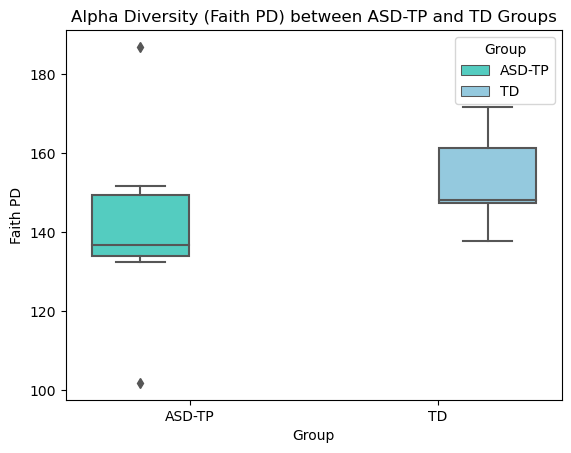

Kruskal-Wallis Test Statistic: 2.551020408163261, p-value: 0.11022304635486589


In [75]:
# Filter asd_md for ASD-TP and TD groups
asd_tp_df = asd_fpd.loc[matches[0].index]
td_df = asd_fpd.loc[matches[0].values]

# Concatenate the two DataFrames and add a new column to label the groups
asd_tp_df['Group'] = 'ASD-TP'
td_df['Group'] = 'TD'
combined_df = pd.concat([asd_tp_df, td_df])

# Plotting
sns.boxplot(x='Group', y='faith_pd', data=combined_df, hue='Group', palette=['turquoise', 'skyblue'])
plt.title('Alpha Diversity (Faith PD) between ASD-TP and TD Groups')
plt.ylabel('Faith PD')
plt.show()

# Extracting Faith PD values for each group
faith_pd_asd_tp = combined_df[combined_df['Group'] == 'ASD-TP']['faith_pd']
faith_pd_td = combined_df[combined_df['Group'] == 'TD']['faith_pd']

# Kruskal-Wallis Test
stat2, p2 = kruskal(faith_pd_asd_tp, faith_pd_td)
print(f'Kruskal-Wallis Test Statistic: {stat2}, p-value: {p2}')

In [19]:
print(f'Before Case-Control Matching using Qupid: ')
print(f'Kruskal-Wallis Test Statistic: {stat1}, p-value: {p1}\n')
print(f'After Case-Control Matching using Qupid: ')
print(f'Kruskal-Wallis Test Statistic: {stat2}, p-value: {p2}')

Before Case-Control Matching using Qupid: 
Kruskal-Wallis Test Statistic: 0.03673469387754835, p-value: 0.8480062142193152

After Case-Control Matching using Qupid: 
Kruskal-Wallis Test Statistic: 0.0040816326530617175, p-value: 0.9490596808859298


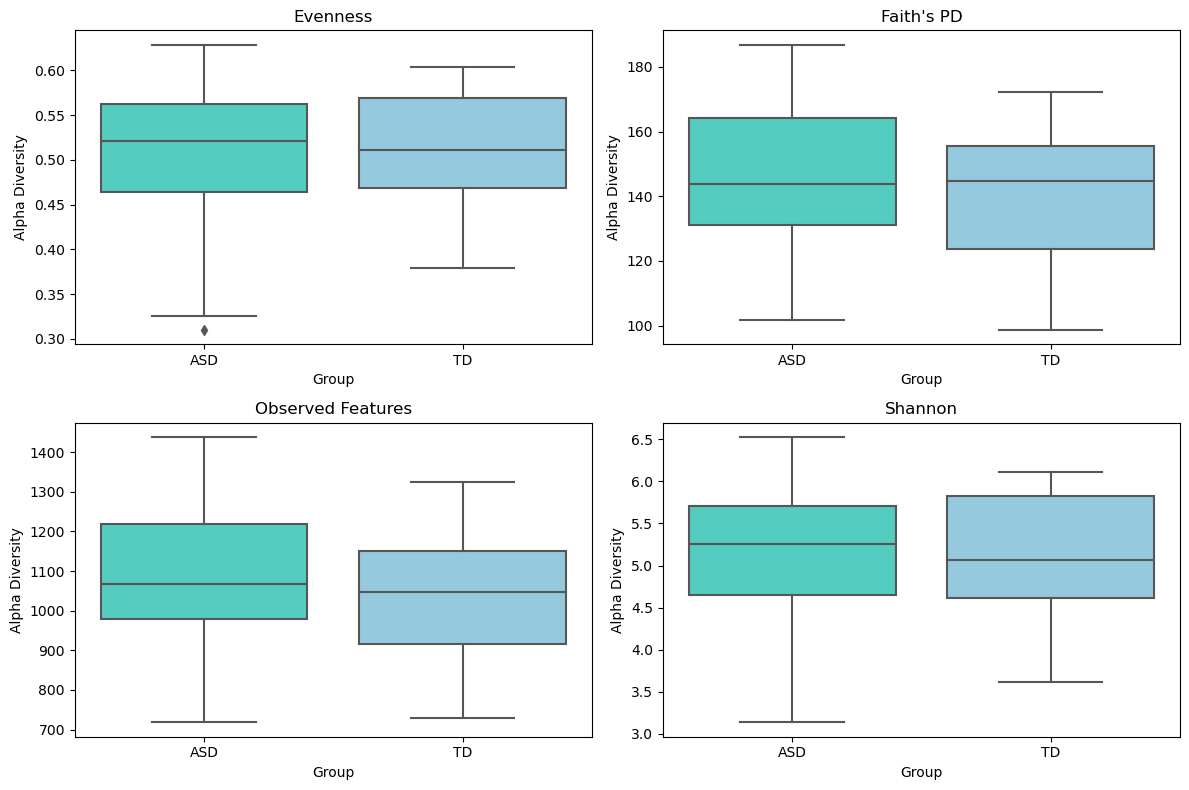

Evenness: Mann-Whitney U statistic = 655.0, p-value = 0.7941892150565808
Faith's PD: Mann-Whitney U statistic = 715.0, p-value = 0.3682526895650068
Observed Features: Mann-Whitney U statistic = 726.5, p-value = 0.30666983607843723
Shannon: Mann-Whitney U statistic = 673.0, p-value = 0.6508817642701086


In [76]:
# Load the alpha diversity vectors
evenness = Artifact.load('out/rarefaction_500000/evenness_vector.qza')
faith_pd = Artifact.load('out/rarefaction_500000/faith_pd_vector.qza')
observed_features = Artifact.load('out/rarefaction_500000/observed_features_vector.qza')
shannon = Artifact.load('out/rarefaction_500000/shannon_vector.qza')

# Convert the alpha diversity vectors to pandas DataFrames
evenness_df = evenness.view(pd.Series).to_frame(name='Evenness')
faith_pd_df = faith_pd.view(pd.Series).to_frame(name='Faith_PD')
observed_features_df = observed_features.view(pd.Series).to_frame(name='Observed_Features')
shannon_df = shannon.view(pd.Series).to_frame(name='Shannon')

# Merge the DataFrames
alpha_diversity_df = pd.concat([evenness_df, faith_pd_df, observed_features_df, shannon_df], axis=1)

# Add metadata if available (assuming you have a metadata file)
metadata = pd.read_table("data/Metadata.tsv", sep="\t", index_col=0)
alpha_diversity_df = alpha_diversity_df.merge(metadata, left_index=True, right_index=True)


# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

# Visualize the alpha diversity metrics using box plots
sns.boxplot(data=alpha_diversity_df, x='dx', y='Evenness', ax=axs[0], palette=['turquoise', 'skyblue'])
sns.boxplot(data=alpha_diversity_df, x='dx', y='Faith_PD', ax=axs[1], palette=['turquoise', 'skyblue'])
sns.boxplot(data=alpha_diversity_df, x='dx', y='Observed_Features', ax=axs[2], palette=['turquoise', 'skyblue'])
sns.boxplot(data=alpha_diversity_df, x='dx', y='Shannon', ax=axs[3], palette=['turquoise', 'skyblue'])

# Set plot titles and labels
axs[0].set_title('Evenness')
axs[1].set_title('Faith\'s PD')
axs[2].set_title('Observed Features')
axs[3].set_title('Shannon')

for ax in axs:
    ax.set_xlabel('Group')
    ax.set_ylabel('Alpha Diversity')

plt.tight_layout()
plt.show()

# Perform Mann-Whitney U test to compare alpha diversity between groups
group1 = alpha_diversity_df[alpha_diversity_df['dx'] == 'ASD']
group2 = alpha_diversity_df[alpha_diversity_df['dx'] == 'TD']

evenness_stat, evenness_p = mannwhitneyu(group1['Evenness'], group2['Evenness'])
faith_pd_stat, faith_pd_p = mannwhitneyu(group1['Faith_PD'], group2['Faith_PD'])
observed_features_stat, observed_features_p = mannwhitneyu(group1['Observed_Features'], group2['Observed_Features'])
shannon_stat, shannon_p = mannwhitneyu(group1['Shannon'], group2['Shannon'])

print(f"Evenness: Mann-Whitney U statistic = {evenness_stat}, p-value = {evenness_p}")
print(f"Faith's PD: Mann-Whitney U statistic = {faith_pd_stat}, p-value = {faith_pd_p}")
print(f"Observed Features: Mann-Whitney U statistic = {observed_features_stat}, p-value = {observed_features_p}")
print(f"Shannon: Mann-Whitney U statistic = {shannon_stat}, p-value = {shannon_p}")

In [20]:
# Perform Mann-Whitney U test to compare alpha diversity between groups
group1 = alpha_diversity_df[alpha_diversity_df['dx_geopref'] == 'ASD']
group2 = alpha_diversity_df[alpha_diversity_df['dx_geopref'] == 'TP']

evenness_stat, evenness_p = mannwhitneyu(group1['Evenness'], group2['Evenness'])
faith_pd_stat, faith_pd_p = mannwhitneyu(group1['Faith_PD'], group2['Faith_PD'])
observed_features_stat, observed_features_p = mannwhitneyu(group1['Observed_Features'], group2['Observed_Features'])
shannon_stat, shannon_p = mannwhitneyu(group1['Shannon'], group2['Shannon'])

print(f"Evenness: Mann-Whitney U statistic = {evenness_stat}, p-value = {evenness_p}")
print(f"Faith's PD: Mann-Whitney U statistic = {faith_pd_stat}, p-value = {faith_pd_p}")
print(f"Observed Features: Mann-Whitney U statistic = {observed_features_stat}, p-value = {observed_features_p}")
print(f"Shannon: Mann-Whitney U statistic = {shannon_stat}, p-value = {shannon_p}")

Evenness: Mann-Whitney U statistic = 160.0, p-value = 0.8829468685408175
Faith's PD: Mann-Whitney U statistic = 157.0, p-value = 0.946648148004191
Observed Features: Mann-Whitney U statistic = 147.0, p-value = 0.858781940970152
Shannon: Mann-Whitney U statistic = 164.0, p-value = 0.799190136739247


### Plots

<AxesSubplot: xlabel='dx_geopref', ylabel='Faith_PD'>

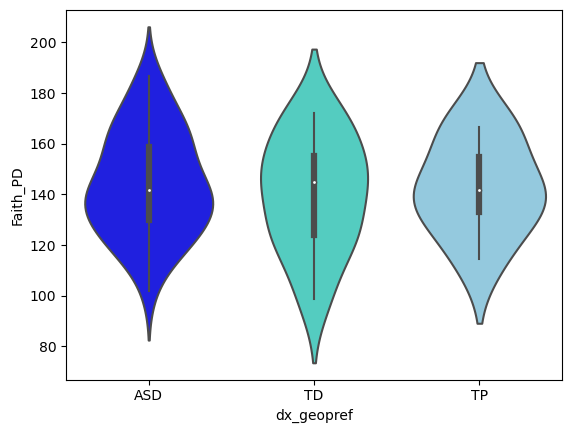

In [77]:
sns.violinplot(data=alpha_diversity_df, x='dx_geopref', y='Faith_PD', jitter ='true', dodge = 'true', palette=['blue', 'turquoise', 'skyblue'])

<AxesSubplot: xlabel='dx', ylabel='Observed_Features'>

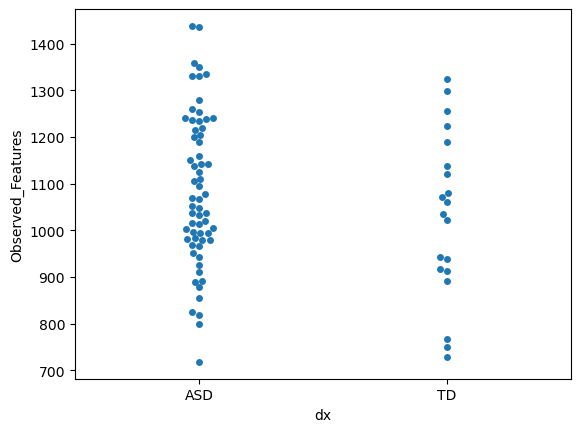

In [22]:
sns.swarmplot(data=alpha_diversity_df, x='dx', y='Observed_Features')

<AxesSubplot: xlabel='Faith_PD', ylabel='Density'>

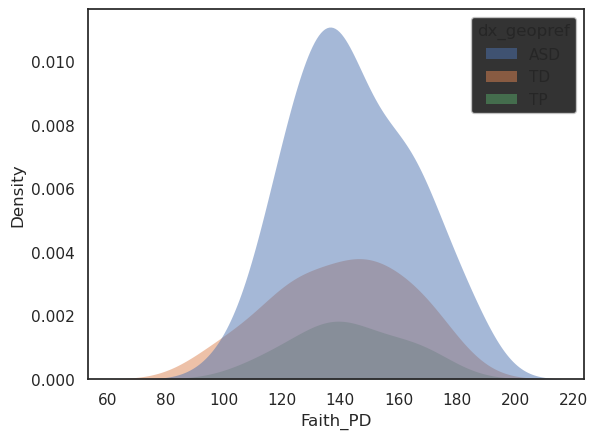

In [23]:
# overlapping density plot that shows the distribution of alpha diversity metrics across different groups
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.kdeplot(data=alpha_diversity_df, x='Faith_PD', hue='dx_geopref', fill=True, alpha=0.5, linewidth=0)

In [24]:
# sns.heatmap(alpha_diversity_df.corr(), cmap='coolwarm', annot=True)

<Figure size 1000x600 with 0 Axes>

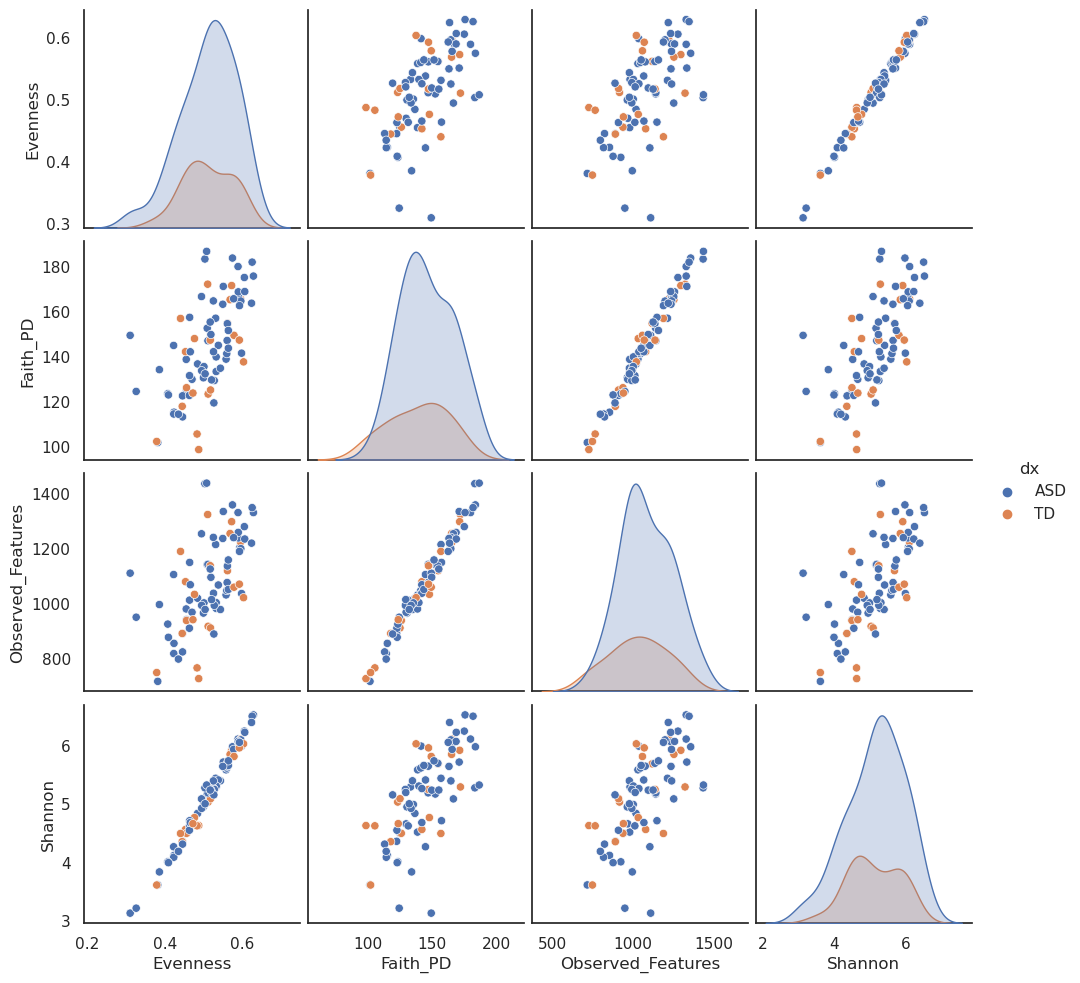

In [25]:
plt.figure(figsize=(10, 6))
sns.pairplot(alpha_diversity_df, vars=['Evenness', 'Faith_PD', 'Observed_Features', 'Shannon'], hue='dx')
plt.show()

### Exploring Alpha Diversity

/tmp/ipykernel_9427/3028631783.py:2: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x='dx', y='Shannon', data=alpha_diversity_df, hue='dx', dodge=True, jitter=True, palette=['black'])


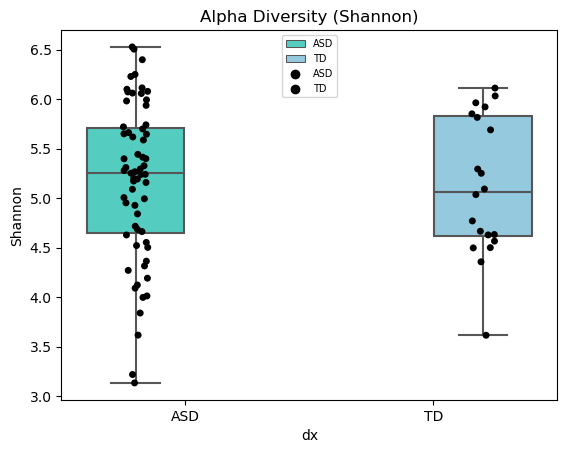

In [80]:
sns.boxplot(x='dx', y='Shannon', data=alpha_diversity_df, hue='dx', palette=['turquoise', 'skyblue'])
sns.stripplot(x='dx', y='Shannon', data=alpha_diversity_df, hue='dx', dodge=True, jitter=True, palette=['black']) 

plt.title('Alpha Diversity (Shannon)')
plt.ylabel('Shannon')
plt.legend(loc='upper center', fontsize = "7")
plt.show()

/tmp/ipykernel_9427/1022236493.py:2: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x='dx', y='Evenness', data=alpha_diversity_df, hue='dx', dodge=True, jitter=True, palette=['black'])


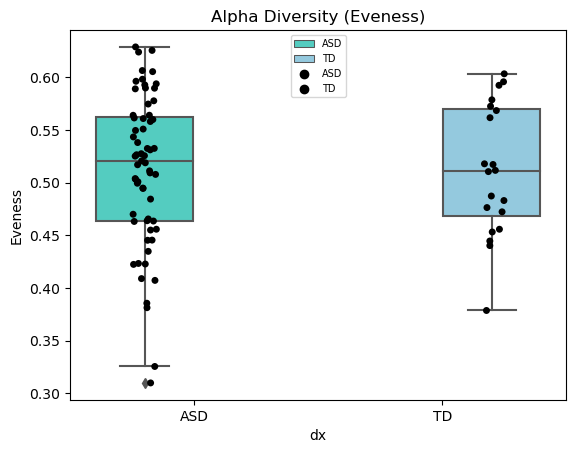

In [81]:
sns.boxplot(x='dx', y='Evenness', data=alpha_diversity_df, hue='dx', palette=['turquoise', 'skyblue'])
sns.stripplot(x='dx', y='Evenness', data=alpha_diversity_df, hue='dx', dodge=True, jitter=True, palette=['black']) 

plt.title('Alpha Diversity (Eveness)')
plt.ylabel('Eveness')
plt.legend(loc='upper center', fontsize = "7")
plt.show()